# Linear regression - Multiple variables

Inspired from notebook here: http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

Purpose of this notebook is to perform linear regression using gradient descent and normal equation manually instead of using scikit built in functions as in the original notebook.

## Step 1: Reading input data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

## Step 2: Plotting/Visualizing input data

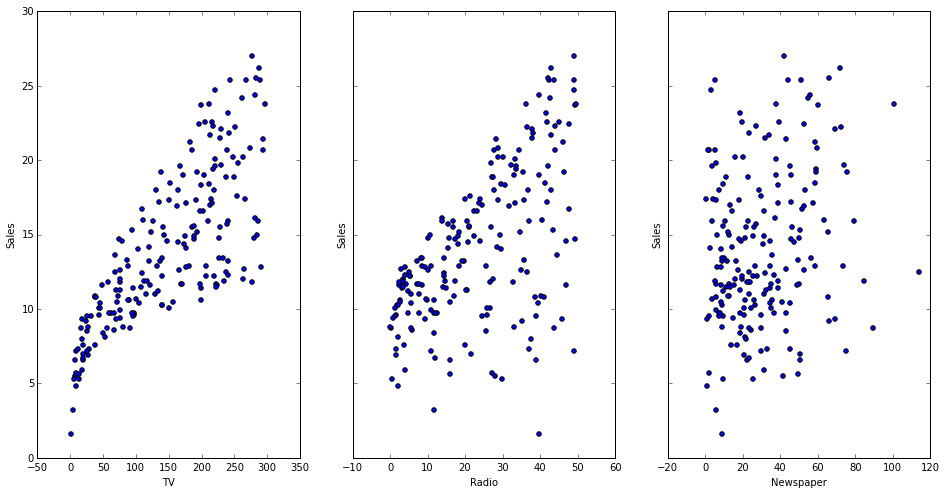

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Step 3: Calculating parameters of regression

Linear regression attempts to map inputs to outputs as follows:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 ... \theta_n x_n
$$
where,
* $ x_1 ... x_n $ are 'n' input features
* $ \theta_1 ... \theta_n $ are feature parameters
* $ \theta_0 $ is intercept parameter

To simplify/optimize calculations, we introduce an artificial feature $ x_0 $ which is always 1, so that our linear regression relation looks like following:

$$
y = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 ... \theta_n x_n
$$

We represent input feature vector as $ X $ ((n+1) x 1 matrix) and feature vector as $ \theta $ ((n+1) x 1 matrix) . The output can be simply calculated by following formula:

$$
y = \theta^T X
$$

In [6]:
# Hypothesis function
def hypothesisLinearRegression(theta, X):
    return np.dot(X, theta)

### 3.1 Calculating cost for a given $ \theta $

The cost associated with a given set of parameters ($\theta$) can be calculated as a sum of squared errors as follows:

$$
J = \frac {1}{2m} \sum_{i=1}^{m} [h_\theta(x^{(i)}) - y^{(i)}]^2
$$
where $h_\theta(x^{(i)})$ is the hypothesis on a set of input values $x^{(i)}$ for a given $\theta$

In [7]:
# Function to calculate cost for a given set of parameters (theta)
def costLinearRegression(theta, X, y):
    m = X.shape[0]
    diff = hypothesisLinearRegression(theta, X) - y
    cost = (1.0/(2 * m)) * sum( pow(diff, 2) )
      
    return cost[0]

### 3.2 Minimizing cost using Gradient Descent

The objective of the algorithm is to find out $\theta$ such that the cost is minimal. So the problem boils down to minimizing the cost with respect to $\theta$, which can be done by taking partial derivative of the cost function with respect to elements of $\theta$.

Using gradient descent algorithm, we can initialize $\theta$ to contain all zeroes (any random values are equally appropriate) and take one step at a time towards a local minima.

Mathematically it can be expressed as follows:

repeat till convergence: {
$$
\begin{align}
\theta_0 := \theta_0 - \alpha \frac 1m \sum_{1=1}^m ( h_\theta(x^{(i)}) - y^{(i)}).x_0^{(i)} \\
\theta_1 := \theta_0 - \alpha \frac 1m \sum_{1=1}^m ( h_\theta(x^{(i)}) - y^{(i)}).x_1^{(i)} \\
\theta_2 := \theta_0 - \alpha \frac 1m \sum_{1=1}^m ( h_\theta(x^{(i)}) - y^{(i)}).x_2^{(i)} \\
... \\
\theta_n := \theta_0 - \alpha \frac 1m \sum_{1=1}^m ( h_\theta(x^{(i)}) - y^{(i)}).x_n^{(i)} \\
\end{align}
$$
}

We repeatedly calculate new values of $\theta$ from the immediately previous values and calculate cost for the new $\theta$ until the cost no more decreases significantly.

Here $\alpha$ is a chosen constant that represents the step size of gradient descent. Too big step size can cause gradient descent to diverge, while too small step size can cause the algorithm to take a long time to reach global minima.

In [8]:
def gradientDescent(theta, X, y, alpha, num_iters):
    m = X.shape[0]
    cost_history = [costLinearRegression(theta, X, y)]

    for i in range(1,num_iters):
        H = hypothesisLinearRegression(theta, X)
        D = H - y
        theta = theta - ( (alpha/m) * np.dot(D.T, X).T )
        cost_history = np.append(cost_history, costLinearRegression(theta, X, y))
    
    return theta, cost_history

Additionally, gradient descent can be ineffective or inefficient if the different features of data are having different ranges. For example first feature is in range of a few hundreds, while the second and third features are only in range of a few tens.

For these cases, it is helpful to "normalize" all features to same range by using mean and range of the corresponding features.

In [9]:
# Feature normalization
def featureNormalize(X, xmax, xmin, xmean):
    xrange = xmax - xmin
    return ( X - xmean ) / xrange

### Applying gradient descent on data

Training error(100 examples) = 2.0180834913
CV error(50 examples) = 2.98196340063
Test error(50 examples) = 2.0301526179


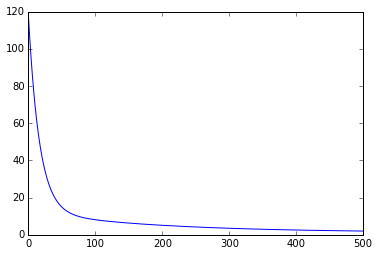

In [10]:
# Extract into separate matrices for input and output
X = data.ix[:,0:3].as_matrix()
y = data.ix[:,3].as_matrix()
y = np.reshape(y, (y.shape[0], 1))

# Adding intercept term to input matrix
X1 = np.append(np.ones((X.shape[0],1)), X, axis = 1)

theta = np.zeros((X.shape[1] + 1, 1))

# Dividing data into three sets
# 1. Training set
# 2. Cross validation set
# 3. Test set
# A good set of parameters should not only prove good for training set,
# but also for cross validation (CV) and test sets
total_size = X.shape[0]
training_set_size = total_size / 2
cv_set_size = total_size / 4
test_set_size = total_size - (training_set_size + cv_set_size)

xmax = X.max(0)
xmin = X.min(0)
xmean = X.mean(0)

Xtrain = X[0:training_set_size, :]
XtrainNorm = featureNormalize(Xtrain, xmax, xmin, xmean)
XtrainNorm = np.append(np.ones((XtrainNorm.shape[0],1)), XtrainNorm, axis = 1)
ytrain = y[0:training_set_size]

Xcv = X[(training_set_size + 1):(training_set_size + cv_set_size), :]
XcvNorm = featureNormalize(Xcv, xmax, xmin, xmean)
XcvNorm = np.append(np.ones((XcvNorm.shape[0],1)), XcvNorm, axis = 1)
ycv = y[(training_set_size + 1): (training_set_size + cv_set_size)]

Xtest = X[(training_set_size + cv_set_size + 1):(training_set_size + cv_set_size + test_set_size), :]
XtestNorm = featureNormalize(Xtest, xmax, xmin, xmean)
XtestNorm = np.append(np.ones((XtestNorm.shape[0],1)), XtestNorm, axis = 1)
ytest = y[(training_set_size + cv_set_size + 1): (training_set_size + cv_set_size + test_set_size)]

# Determined by trial and error
alpha = 0.03
num_iters = 500

theta, cost_history = gradientDescent(theta, XtrainNorm, ytrain, alpha, num_iters)
plt.plot(cost_history)

print "Training error(" + str(training_set_size) + " examples) = " + str(costLinearRegression(theta, XtrainNorm, ytrain))
print "CV error(" + str(cv_set_size) + " examples) = " + str(costLinearRegression(theta, XcvNorm, ycv))
print "Test error(" + str(test_set_size) + " examples) = " + str(costLinearRegression(theta, XtestNorm, ytest))


## Predicting sales for a given advertising budget

Now we have a trained model, which can be used for predicting sales for any given set of values for TV, radio and newspaper advertising.
So, lets take example case where we allocate following budgets:

| TV   | Radio | Newspaper |
| ---- |-------|-----------|
| 10   | 5     | 5         |
| 50   | 25    | 25        |
| 100  | 50    | 50        |
| 200  | 100   | 50        |
| 100  | 5     | 10        |

We want to predict what sales to expect for this budget.


In [11]:
Xpred = np.matrix('10 5 5; 50 25 25; 100 50 50; 200 100 50; 100 5 10')
XpredNorm = featureNormalize(Xpred, xmax, xmin, xmean)
XpredNorm = np.append(np.ones((XpredNorm.shape[0],1)), XpredNorm, axis = 1)

ypred = hypothesisLinearRegression(theta, XpredNorm)
                             
print "Predicted sales for given data = " + str(ypred)

Predicted sales for given data = [[  6.94471129]
 [ 11.22847305]
 [ 16.58317526]
 [ 26.93763672]
 [  9.95552631]]


So our prediction for sales for given data is as follows:

| TV   | Radio | Newspaper | Sales |
| ---- |-------|-----------| ----- |
| 10   | 5     | 5         | 6.94  | 
| 50   | 25    | 25        | 11.22 |
| 100  | 50    | 50        | 16.58 |
| 200  | 100   | 50        | 26.93 |
| 100  | 5     | 10        | 9.95  |

### 3.3 Minimizing cost using normal equation

Instead of using gradient descent, which moves one step at a time towards global cost minima and finds the corresponding parameters of regression, we can arrive directly at the parameters which would minimize cost using normal equation.

The $\theta$ that minimizes cost is given by:
$$
\theta = (X^TX)^{-1}X^Ty
$$

Comparison of gradient descent vs Normal equation approach:

| Gradient descent | Normal equation |
|------------------|-----------------|
| Needs feature scaling | Does not need feature scaling |
| Needs to choose optimal step size $\alpha$ | Does not need step size |
| Works well for large number of features 'n' | Slow for large number of features 'n' |


In [32]:
def normalEquation(X, y):
    from numpy.linalg import inv
    theta= np.dot( np.dot( inv( np.dot(X.T, X) ), X.T ), y )
    return theta

Using the above function, we can calculate the new theta:

In [34]:
theta_ne = normalEquation(XtrainNorm, ytrain)

print "Training error(" + str(training_set_size) + " examples) = " + str(costLinearRegression(theta_ne, XtrainNorm, ytrain))
print "CV error(" + str(cv_set_size) + " examples) = " + str(costLinearRegression(theta_ne, XcvNorm, ycv))
print "Test error(" + str(test_set_size) + " examples) = " + str(costLinearRegression(theta_ne, XtestNorm, ytest))

Training error(100 examples) = 1.16186519764
CV error(50 examples) = 2.08086215169
Test error(50 examples) = 1.26692081356


## Predicting sales for a given advertising budget

Lets predict the sales for the same advertising budget that we used for gradient descent above.

In [36]:
ypred_ne = hypothesisLinearRegression(theta_ne, XpredNorm)

print "Predicted sales for given data = " + str(ypred_ne)

Predicted sales for given data = [[  4.71202839]
 [ 10.16100038]
 [ 16.97221536]
 [ 31.12793295]
 [  8.75486473]]


So our prediction for sales for given data is as follows:

| TV   | Radio | Newspaper | Sales predicted using gradient descent | Sales predicted using normal equation
| ---- |-------|-----------| ----- |------|
| 10   | 5     | 5         | 6.94  | 4.71 |
| 50   | 25    | 25        | 11.22 | 10.16 |
| 100  | 50    | 50        | 16.58 | 16.97 |
| 200  | 100   | 50        | 26.93 | 31.12 |
| 100  | 5     | 10        | 9.95  | 8.75 |

The values predicted by normal equation are expected to be more accurate due to a lower cost on all three sets of data (training, cv, test) (see above)